In [5]:
from langgraph.graph import StateGraph,START, END
from typing import TypedDict

In [ ]:
#Define State
class BMIState(TypedDict):
    weight_kg: float
    height_m: float
    bmi: float
    category: str

In [7]:
def calculate_bmi(state: BMIState) -> BMIState:

    height = state['height_m']
    weight = state['weight_kg']
    bmi = weight/(height**2)
    state['bmi'] = round(bmi, 2)
    return state


In [15]:
def label_bmi(state: BMIState) -> BMIState:

    bmi = state['bmi']
    if bmi < 18:
        state['category'] = 'Underweight'
    else:
        state['category'] = 'Normal'

    return state

In [ ]:
#Define Graph
graph = StateGraph(BMIState)

#Add nodes to graph
graph.add_node('calculate_bmi', calculate_bmi)
graph.add_node('label_bmi', label_bmi)

#Add Edges to graph
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'label_bmi')
graph.add_edge('label_bmi', END)


#Compile the graph
workflow = graph.compile()







In [11]:

#Execute Graph
final_state = workflow.invoke({'weight_kg': 80, 'height_m': 1.73})

In [12]:
final_state

{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73}

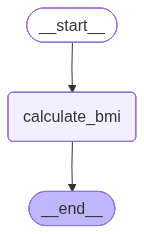

In [13]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())